In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# <B>Data Preparation and Processing</b>

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

As motivation for this data, let's suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

 
The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

In [ ]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger) #age 
    train_labels.append(1) #afftectd

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older) #age
    train_labels.append(0) #no effect

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger) #age
    train_labels.append(0) #dint effect

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older) #age
    train_labels.append(1) #effect

In [ ]:
for i in train_samples:
    print(i) #ages

33
85
15
65
47
96
43
89
64
91
50
89
46
71
51
88
59
87
32
74
64
65
23
67
32
72
17
68
22
68
63
72
47
65
45
71
21
71
13
85
64
92
58
88
63
91
32
68
24
75
51
87
58
72
30
95
61
98
60
100
34
76
18
68
31
67
43
97
23
77
16
73
53
71
37
92
49
90
31
76
22
99
50
95
35
96
56
65
61
96
13
98
23
79
20
83
16
90
15
74
31
99
21
71
40
97
17
98
13
80
49
98
62
85
52
86
53
79
29
70
19
70
48
78
18
71
45
69
21
92
20
95
54
71
31
92
38
92
34
87
46
70
13
75
17
79
18
73
21
78
20
78
56
99
39
89
63
68
23
91
33
87
19
90
34
74
21
75
22
75
32
90
26
82
18
98
28
97
14
66
43
100
52
88
42
82
59
71
40
93
47
76
43
83
58
97
15
78
35
80
34
94
41
92
31
72
27
93
26
74
30
92
25
68
40
82
33
68
56
68
47
80
41
68
54
93
32
66
61
87
58
91
27
81
54
93
26
71
50
94
42
97
34
94
29
100
52
80
62
80
47
90
38
82
27
66
32
96
34
77
23
92
39
65
62
80
47
81
24
68
14
66
56
69
18
87
54
91
22
100
51
81
44
95
46
94
63
83
18
68
48
80
30
96
49
65
31
87
62
88
51
66
42
97
15
99
49
86
37
85
64
75
15
65
64
93
36
95
16
66
21
96
27
84
50
69
20
66
41
95
13
85


In [ ]:
train_labels = np.array(train_labels) #converting to numpy array
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples) #shuffle respectively both

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1)) # scale between 0 to 1
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) #reshape is a formality as transform dont input 1d data

In [ ]:
for i in scaled_train_samples:
    print(i) #nupmy array of ages scaled between 0 to 1

[0.17241379]
[0.8045977]
[0.70114943]
[0.03448276]
[0.94252874]
[0.42528736]
[0.97701149]
[0.27586207]
[0.]
[0.87356322]
[0.16091954]
[0.02298851]
[0.59770115]
[0.5862069]
[0.48275862]
[0.06896552]
[0.26436782]
[0.81609195]
[0.70114943]
[0.97701149]
[0.28735632]
[0.77011494]
[0.83908046]
[0.94252874]
[0.28735632]
[0.63218391]
[0.87356322]
[0.87356322]
[0.54022989]
[0.67816092]
[0.26436782]
[0.94252874]
[0.93103448]
[0.20689655]
[0.3908046]
[0.45977011]
[0.74712644]
[1.]
[0.2183908]
[0.73563218]
[0.81609195]
[0.90804598]
[0.59770115]
[0.7816092]
[0.22988506]
[0.93103448]
[0.34482759]
[0.48275862]
[0.74712644]
[0.52873563]
[0.31034483]
[0.34482759]
[0.2183908]
[0.42528736]
[0.20689655]
[0.7816092]
[0.20689655]
[0.85057471]
[0.01149425]
[0.66666667]
[0.13793103]
[0.88505747]
[0.29885057]
[0.51724138]
[0.05747126]
[0.37931034]
[0.79310345]
[0.91954023]
[0.85057471]
[0.90804598]
[0.98850575]
[0.22988506]
[0.8045977]
[0.86206897]
[0.47126437]
[0.03448276]
[0.22988506]
[0.94252874]
[0.5172413

# <b> Simple tf.keras Sequential Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)
#set_memory_growth() attempts to allocate only as much GPU memory as needed at a given time, and continues to allocate more when needed. If this is not enabled, then we may end up running into the error below when we train the model later.



Num GPUs Available:  1


In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
210/210 - 3s - loss: 0.6402 - accuracy: 0.5695
Epoch 2/30
210/210 - 0s - loss: 0.6134 - accuracy: 0.6648
Epoch 3/30
210/210 - 0s - loss: 0.5846 - accuracy: 0.7171
Epoch 4/30
210/210 - 0s - loss: 0.5538 - accuracy: 0.7690
Epoch 5/30
210/210 - 0s - loss: 0.5215 - accuracy: 0.7962
Epoch 6/30
210/210 - 0s - loss: 0.4881 - accuracy: 0.8305
Epoch 7/30
210/210 - 0s - loss: 0.4553 - accuracy: 0.8533
Epoch 8/30
210/210 - 0s - loss: 0.4243 - accuracy: 0.8724
Epoch 9/30
210/210 - 0s - loss: 0.3962 - accuracy: 0.8910
Epoch 10/30
210/210 - 0s - loss: 0.3718 - accuracy: 0.8981
Epoch 11/30
210/210 - 0s - loss: 0.3507 - accuracy: 0.9052
Epoch 12/30
210/210 - 0s - loss: 0.3331 - accuracy: 0.9157
Epoch 13/30
210/210 - 0s - loss: 0.3185 - accuracy: 0.9176
Epoch 14/30
210/210 - 0s - loss: 0.3064 - accuracy: 0.9186
Epoch 15/30
210/210 - 0s - loss: 0.2965 - accuracy: 0.9257
Epoch 16/30
210/210 - 0s - loss: 0.2881 - accuracy: 0.9286
Epoch 17/30
210/210 - 0s - loss: 0.2814 - accuracy: 0.9286
Epoch 

In [ ]:
#with validation
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.2459 - accuracy: 0.9439 - val_loss: 0.2326 - val_accuracy: 0.9476
Epoch 2/30
189/189 - 0s - loss: 0.2450 - accuracy: 0.9444 - val_loss: 0.2316 - val_accuracy: 0.9476
Epoch 3/30
189/189 - 0s - loss: 0.2441 - accuracy: 0.9444 - val_loss: 0.2315 - val_accuracy: 0.9476
Epoch 4/30
189/189 - 0s - loss: 0.2434 - accuracy: 0.9444 - val_loss: 0.2310 - val_accuracy: 0.9476
Epoch 5/30
189/189 - 0s - loss: 0.2426 - accuracy: 0.9439 - val_loss: 0.2315 - val_accuracy: 0.9476
Epoch 6/30
189/189 - 0s - loss: 0.2419 - accuracy: 0.9444 - val_loss: 0.2311 - val_accuracy: 0.9476
Epoch 7/30
189/189 - 0s - loss: 0.2414 - accuracy: 0.9444 - val_loss: 0.2304 - val_accuracy: 0.9476
Epoch 8/30
189/189 - 0s - loss: 0.2408 - accuracy: 0.9455 - val_loss: 0.2301 - val_accuracy: 0.9476
Epoch 9/30
189/189 - 0s - loss: 0.2403 - accuracy: 0.9450 - val_loss: 0.2284 - val_accuracy: 0.9476
Epoch 10/30
189/189 - 0s - loss: 0.2399 - accuracy: 0.9460 - val_loss: 0.2283 - val_accuracy: 0.9476

### testing

In [ ]:
#creating test data
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
) 

In [ ]:
for i in predictions:
    print(i)

[0.03448488 0.96551514]
[0.02398277 0.9760173 ]
[0.97108716 0.02891282]
[0.97171426 0.02828572]
[0.44735947 0.55264056]
[0.5515432  0.44845685]
[0.07016665 0.92983335]
[0.03448488 0.96551514]
[0.02627159 0.9737284 ]
[0.03150362 0.9684964 ]
[0.02627159 0.9737284 ]
[0.97001195 0.0299881 ]
[0.7777393 0.2222607]
[0.02877244 0.9712276 ]
[0.01822356 0.9817764 ]
[0.92215794 0.07784207]
[0.9715067  0.02849328]
[0.30180347 0.69819653]
[0.3964038  0.60359627]
[0.44735947 0.55264056]
[0.960704   0.03929597]
[0.5515432  0.44845685]
[0.8676019  0.13239813]
[0.02188885 0.97811115]
[0.01516251 0.9848375 ]
[0.9706616  0.02933837]
[0.18753536 0.81246465]
[0.9676317  0.03236832]
[0.7777393 0.2222607]
[0.9553663  0.04463373]
[0.9720373  0.02796267]
[0.96473885 0.03526108]
[0.01260903 0.98739094]
[0.9553663  0.04463373]
[0.9721432  0.02785679]
[0.30180347 0.69819653]
[0.09884473 0.90115535]
[0.02877244 0.9712276 ]
[0.9706616  0.02933837]
[0.06430614 0.93569386]
[0.9706616  0.02933837]
[0.06430614 0.935693

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
for i in rounded_predictions:
    print(i)

1
1
0
0
1
0
1
1
1
1
1
0
0
1
1
0
0
1
1
1
0
0
0
1
1
0
1
0
0
0
0
0
1
0
0
1
1
1
0
1
0
1
0
0
1
0
1
1
1
1
1
0
0
0
0
1
1
0
0
1
1
1
1
0
0
1
1
0
1
0
1
1
0
1
0
1
1
0
0
0
0
1
0
0
0
1
1
1
1
1
0
0
1
1
1
0
1
0
0
0
0
0
1
1
1
0
0
0
1
1
0
1
0
1
1
1
1
0
1
0
0
0
0
1
1
0
0
0
1
1
1
1
0
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
1
1
0
0
0
0
1
1
0
1
1
0
1
0
0
0
1
0
1
1
1
1
1
1
1
0
1
0
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
0
1
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
1
1
0
1
0
1
1
0
0
1
1
0
1
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
0
1
0
0
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
1
0
0
0
0
1
1
0
0
0
0
0
1
0
0
1
1
1
1
0
0
1
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
0
0
0
1
1
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
0
0
0
1
1


### confusion matrix

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
# function directly from cm website
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[197  13]
 [ 10 200]]


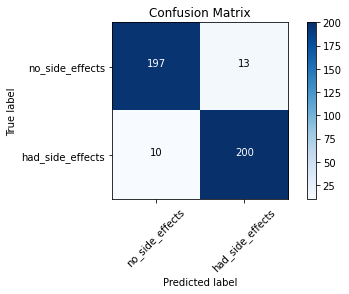

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# <B> Saving and Loading Models

In [ ]:
#If we want to save a model at its current state after it was trained
model.save('models/medical_trial_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#There is another way we save only the architecture of the model. This will not save the model weights, configurations, optimizer, loss or anything else. This only saves the architecture of the model.
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#only saves the weights of the model.
model.save_weights('models/my_model_weights.h5')

In [ ]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model2.load_weights('models/my_model_weights.h5')